In [1]:
import json

In [2]:
dic = json.load(open("accuracy_formatted.json", 'r'))

In [3]:
import pandas as pd

In [4]:
arr = []

In [5]:
for key in sorted(dic.keys()):
    arr.append(dic[key])

In [6]:
df = pd.DataFrame(arr)

In [7]:
df['label'] = df['model'] + '/' + df['dataset']

In [8]:
df.sort_values('label')[['accuracy', 'label']]

,accuracy,label
11,0.273750,CNN/BFW Balanced
7,0.322000,CNN/BFW Probabilistic
13,0.859091,CNN/LFW
17,0.812500,CNN/TA Data
3,0.939394,CNN/Yale Data
8,0.192500,Eigenfaces/BFW Balanced
4,0.200000,Eigenfaces/BFW Probabilistic
0,0.600000,Eigenfaces/LFW
14,0.687500,Eigenfaces/TA Data
18,0.969697,Eigenfaces/Yale Data


In [9]:
df.head()

,accuracy,model,dataset,race_accuracy,gender_accuracy,demographic_accuracy,hyperparams,proportions,label
0,0.600000,Eigenfaces,LFW,{},{},{},"{'n_components': 50, 'C': 1}",{},Eigenfaces/LFW
1,0.395455,Fisherfaces,LFW,{},{},{},{'num_features': 50},{},Fisherfaces/LFW
2,0.757576,LBPH,Yale Data,{},{},{},"{'size': 50, 'metric': 'ChiSquare', 'radius': 1}",{},LBPH/Yale Data
3,0.939394,CNN,Yale Data,{},{},{},{'epochs': 100},{},CNN/Yale Data
4,0.200000,Eigenfaces,BFW Probabilistic,"{'white': 0.1642512077294686, 'black': 0.19, '...","{'males': 0.245136186770428, 'females': 0.1522...","{'white_males': 0.21359223300970873, 'black_fe...","{'n_components': 50, 'C': 1}","{'asian_females': 0.1, 'asian_males': 0.1, 'bl...",Eigenfaces/BFW Probabilistic


<AxesSubplot:xlabel='label'>

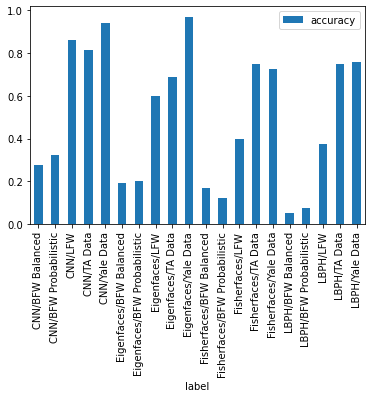

In [10]:
df.sort_values('label').plot(x='label', y='accuracy', kind='bar')

<AxesSubplot:xlabel='model', ylabel='accuracy average across four datasets'>

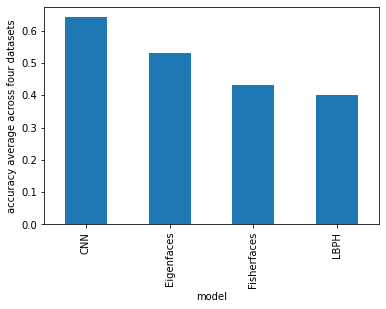

In [11]:
df.groupby("model").accuracy.mean().plot(kind='bar', ylabel='accuracy average across four datasets')

In [12]:
races = ['black', 'white', 'asian', 'indian']
genders = ['males', 'females']
demographics = ['black_males', 'white_males', 'asian_males', 'indian_males', 'black_females', 'white_females', 'asian_females', 'indian_females']

In [13]:
for race in races:
    arr = []
    for row in df.iterrows():
        if row[1].race_accuracy:
            arr.append(row[1].race_accuracy[race])
        else:
            arr.append(None)
    df[race] = arr

In [14]:
for gender in genders:
    arr = []
    for row in df.iterrows():
        if row[1].gender_accuracy:
            arr.append(row[1].gender_accuracy[gender])
        else:
            arr.append(None)
    df[gender] = arr

In [15]:
for demographic in demographics:
    arr = []
    for row in df.iterrows():
        if row[1].demographic_accuracy:
            arr.append(row[1].demographic_accuracy[demographic])
        else:
            arr.append(None)
    df[demographic] = arr

<AxesSubplot:title={'center':'white'}, xlabel='model'>

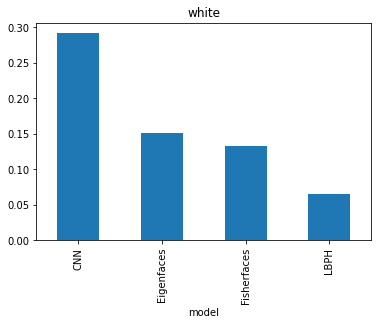

In [16]:
df.groupby('model').white.mean().plot(kind='bar', title='white')

<AxesSubplot:title={'center':'black'}, xlabel='model'>

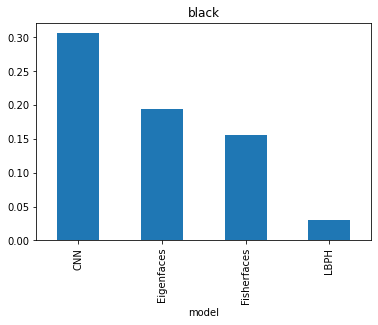

In [17]:
df.groupby('model').black.mean().plot(kind='bar', title='black')

<AxesSubplot:title={'center':'asian'}, xlabel='model'>

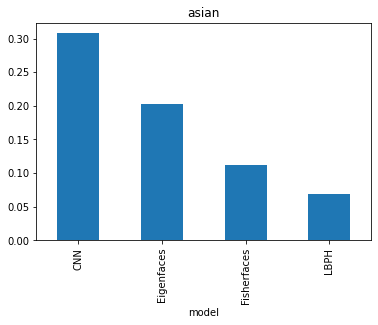

In [18]:
df.groupby('model').asian.mean().plot(kind='bar', title='asian')

<AxesSubplot:title={'center':'indian'}, xlabel='model'>

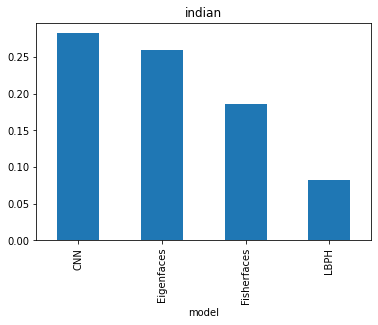

In [19]:
df.groupby('model').indian.mean().plot(kind='bar', title='indian')

<AxesSubplot:title={'center':'males'}, xlabel='model'>

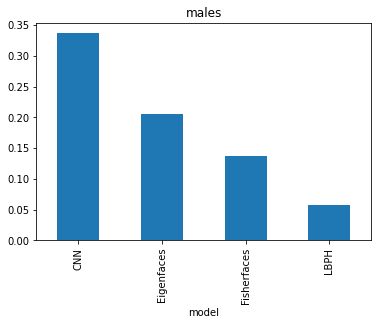

In [20]:
df.groupby('model').males.mean().plot(kind='bar', title='males')

<AxesSubplot:title={'center':'females'}, xlabel='model'>

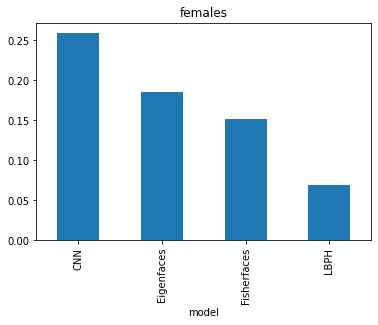

In [21]:
df.groupby('model').females.mean().plot(kind='bar', title='females')

<AxesSubplot:xlabel='model'>

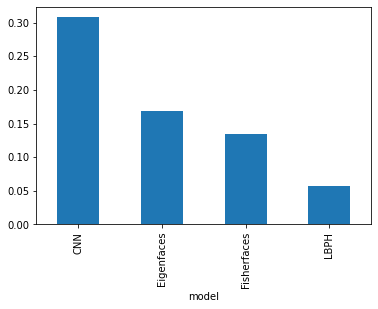

In [22]:
df.groupby('model').white_males.mean().plot(kind='bar')

<AxesSubplot:xlabel='model'>

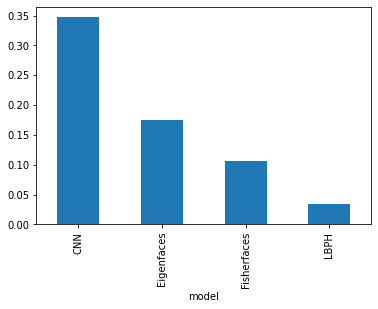

In [23]:
df.groupby('model').black_males.mean().plot(kind='bar')

<AxesSubplot:xlabel='model'>

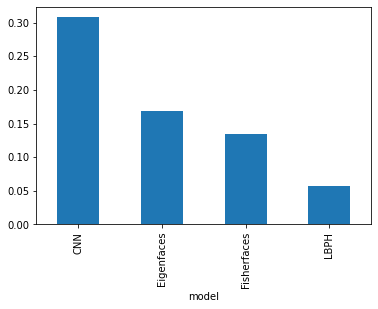

In [24]:
df.groupby('model').white_males.mean().plot(kind='bar')

In [25]:
df.dataset

0                   LFW
1                   LFW
2             Yale Data
3             Yale Data
4     BFW Probabilistic
5     BFW Probabilistic
6     BFW Probabilistic
7     BFW Probabilistic
8          BFW Balanced
9          BFW Balanced
10         BFW Balanced
11         BFW Balanced
12                  LFW
13                  LFW
14              TA Data
15              TA Data
16              TA Data
17              TA Data
18            Yale Data
19            Yale Data
Name: dataset, dtype: object

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

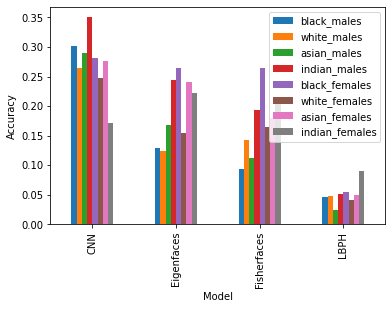

In [26]:
df.loc[df.dataset == "BFW Balanced"].groupby('model')[demographics].mean().plot(kind="bar", xlabel="Model", ylabel="Accuracy")